In [1161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [1162]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [1163]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1205]:
df=pd.read_csv('titanic.csv')
df.shape


(1309, 21)

In [1206]:
df=df.iloc[:, 0:12]

In [1165]:
df.shape

(1309, 12)

In [1166]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1167]:
df.duplicated().sum()

0

In [1168]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,True,False
1305,False,True,False,False,False,False,False,False,False,False,False,False
1306,False,True,False,False,False,False,False,False,False,False,True,False
1307,False,True,False,False,False,True,False,False,False,False,True,False


In [1169]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [1170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [1171]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Embarked'>

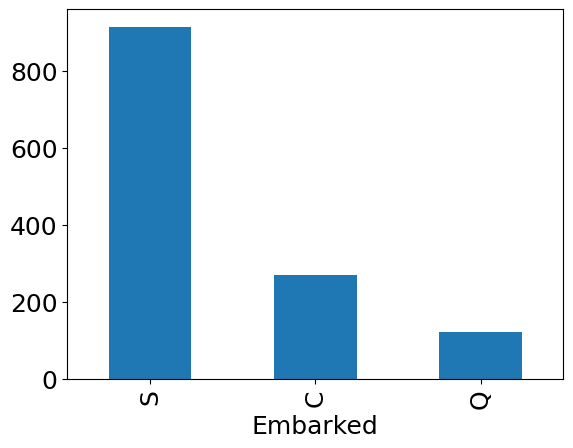

In [1172]:
df['Embarked'].value_counts().plot(kind='bar')

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

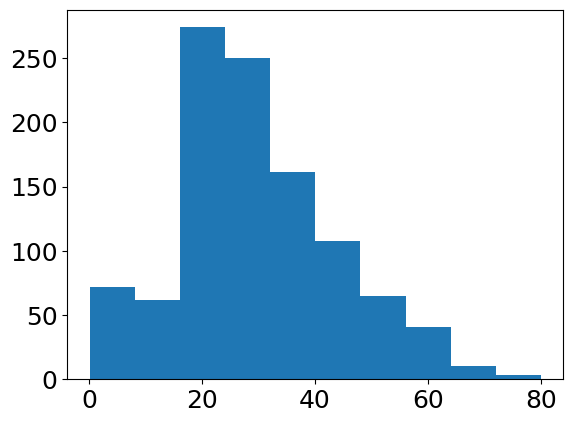

In [1173]:
plt.hist(df['Age'])

<Axes: xlabel='Age', ylabel='Survived'>

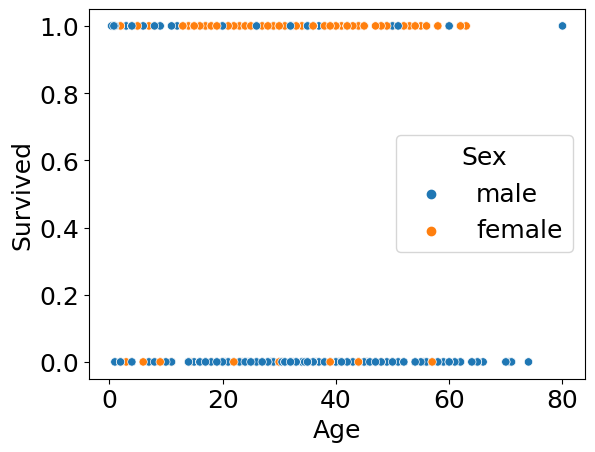

In [1174]:
sns.scatterplot(x=df['Age'], y=df['Survived'], hue=df['Sex'])

<Axes: xlabel='Fare', ylabel='Survived'>

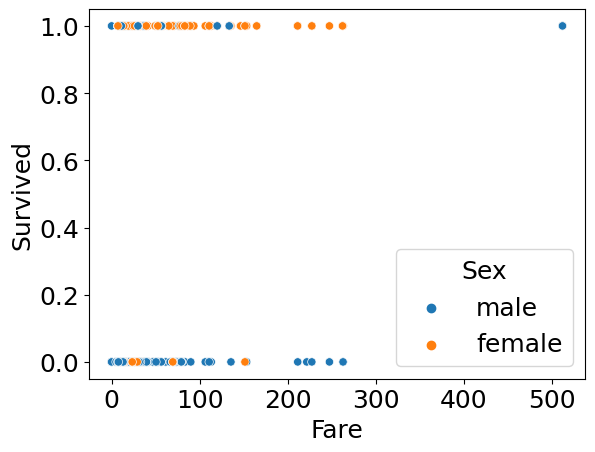

In [1175]:
sns.scatterplot(x=df['Fare'], y=df['Survived'], hue=df['Sex'])

<Axes: xlabel='Pclass', ylabel='Age'>

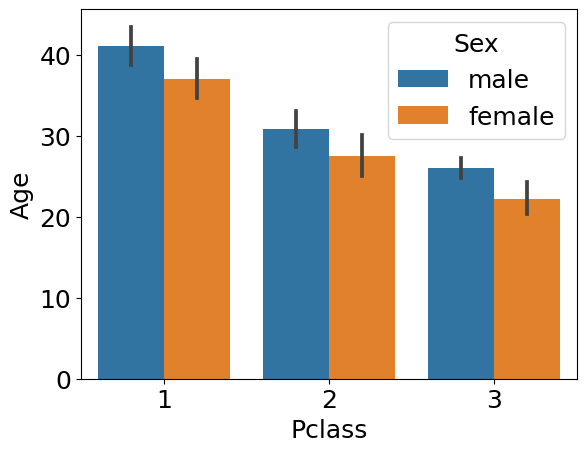

In [1176]:
sns.barplot(x=df["Pclass"], y=df['Age'], hue=df['Sex'])

In [1177]:
df.drop(columns=['Cabin'], inplace=True)

In [1178]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [1179]:
df.dropna(subset=['Survived'], inplace=True)

In [1180]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [1181]:
df.shape

(891, 11)

In [1182]:
X = df.drop(columns=['Survived', 'Name', 'PassengerId', 'Ticket'])
y = df['Survived']

In [1183]:
numeric_features=X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [1184]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

ct = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ], remainder='passthrough')

In [1185]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [1186]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.500000,0,0,28.5000,S
733,2,male,23.000000,0,0,13.0000,S
382,3,male,32.000000,0,0,7.9250,S
704,3,male,26.000000,1,0,7.8542,S
813,3,female,6.000000,4,2,31.2750,S
...,...,...,...,...,...,...,...
106,3,female,21.000000,0,0,7.6500,S
270,1,male,29.881138,0,0,31.0000,S
860,3,male,41.000000,2,0,14.1083,S
435,1,female,14.000000,1,2,120.0000,S


In [1187]:
X_train.shape

(712, 7)

In [1188]:
X_test.shape

(179, 7)

In [1189]:
y_train.shape

(712,)

In [1190]:
y_test.shape

(179,)

In [1191]:
y.isnull().sum()

0

In [1192]:
pipeline1 = Pipeline([
    ('preprocessor', ct),
    ('classifier', RandomForestClassifier(random_state=42)) 
])

In [1193]:
pipeline2 = Pipeline([
    ('preprocessor', ct),
    ('classifier', LogisticRegression(random_state=42)) 
])

In [1194]:
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Embarked'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [1195]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Embarked'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [1196]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline1, X_train, y_train, cv=25, scoring='roc_auc')
mean_cv_score1 = cv_scores.mean()

In [1197]:
print('Default RandomForest cv score:', mean_cv_score1)

Default RandomForest cv score: 0.8409780154486036


In [1198]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline2, X_train, y_train, cv=25, scoring='roc_auc')
mean_cv_score2 = cv_scores.mean()

In [1199]:
print('Default logistic Reg cv score:', mean_cv_score2)

Default logistic Reg cv score: 0.8366595365418894


# Using RamdomizedSearchCV

In [1200]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions_rf = {
    'classifier__n_estimators': randint(10, 200),
    'classifier__max_depth': randint(1, 20)
}

random_search1 = RandomizedSearchCV(pipeline1, param_distributions=param_distributions_rf, n_iter=50, cv=5, scoring='roc_auc', random_state=42)
random_search1.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best parameters from Random Search:", best_params_random)
print("Best ROC AUC from Random Search:", best_score_random)

Best parameters from Random Search: {'classifier__C': 10}
Best ROC AUC from Random Search: 0.8426290232549507


In [1207]:
y_pred = random_search1.predict(X_test)

test_roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC on test set for Random Forest:", test_roc_auc)

ROC AUC on test set for Random Forest: 0.7997425997425998


In [1211]:
param_distributions_lr = {
    'classifier__C': (0.01, 15)
}

random_search2 = RandomizedSearchCV(pipeline2, param_distributions=param_distributions_lr, n_iter=50, cv=5, scoring='roc_auc', random_state=42)
random_search2.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best parameters from LR:", best_params_random)
print("Best ROC AUC from LR:", best_score_random)

Best parameters from LR: {'classifier__C': 10}
Best ROC AUC from LR: 0.8426290232549507


/Users/baveja/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [1212]:
# Predict on the test set
y_pred = random_search2.predict(X_test)

# Calculate ROC AUC score on the test set
test_roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC on test set for LR:", test_roc_auc)

ROC AUC on test set for LR: 0.8001930501930502


# Using BayesSearchCV

In [1217]:
pip install scikit-optimize

python(27997) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [1214]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical


In [1215]:
param_space_rf_opt = {
    'classifier__n_estimators': Integer(50, 200),
    'classifier__max_depth': Integer(5, 20),
    'classifier__min_samples_split': Real(0.01, 1.0, prior='log-uniform'),
    'classifier__min_samples_leaf': Real(0.01, 0.5, prior='log-uniform')
}


In [1216]:
opt = BayesSearchCV(
    pipeline1,
    param_space_rf_opt,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)
opt.fit(X_train, y_train)

# Get the best parameters and score
best_params_opt = opt.best_params_
best_score_opt = opt.best_score_

print("Best Parameters:", best_params_opt)
print("Best ROC AUC Score:", best_score_opt)

python(27949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(27950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(27951) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(27952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(27953) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(27954) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(27955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(27956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best Parameters: OrderedDict([('classifier__max_depth', 5), ('classifier__min_samples_leaf', 0.01), ('classifier__min_samples_split', 0.01), ('classifier__n_estimators', 56)])
Best ROC AUC Score: 0.8566862355446201
